In [119]:
import pandas as pd

#monday = pd.read_csv('monday.csv')
tuesday = pd.read_csv('tuesday.csv', sep=';')
wednesday = pd.read_csv('wednesday.csv',sep=';')
#thursday = pd.read_csv('thursday.csv')
#friday= pd.read_csv('friday.csv')

In [4]:
wednesday.shape, tuesday.shape

((5050, 3), (4714, 3))

In [6]:
tuesday.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy


In [7]:
tuesday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4714 entries, 0 to 4713
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4714 non-null   object
 1   customer_no  4714 non-null   int64 
 2   location     4714 non-null   object
dtypes: int64(1), object(2)
memory usage: 110.6+ KB


In [120]:
tuesday['timestamp'] = pd.to_datetime(tuesday['timestamp'], infer_datetime_format=True)

In [9]:
tuesday.describe()

,customer_no
count,4714.000000
mean,706.052397
std,414.187438
min,1.000000
25%,338.250000
50%,710.000000
75%,1067.750000
max,1422.000000


In [10]:
#Number of customers per section
tuesday.groupby('location').count()

,timestamp,customer_no
location,,
checkout,1420,1420
dairy,911,911
drinks,713,713
fruit,976,976
spices,694,694


<AxesSubplot:xlabel='timestamp', ylabel='customer_no'>

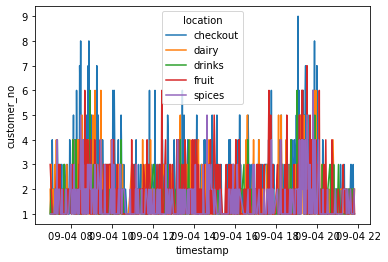

In [14]:
#Number of customers per section over time

import seaborn as sns

gb_1 = pd.DataFrame(wednesday.groupby(['location','timestamp']).count())

sns.lineplot(data=gb_1, x='timestamp', y='customer_no',hue='location')




In [ ]:
#Number of customers at checkout over time

In [ ]:
#time each customer spent in the market

In [ ]:
#Total number of customers over time 

<AxesSubplot:xlabel='timestamp'>

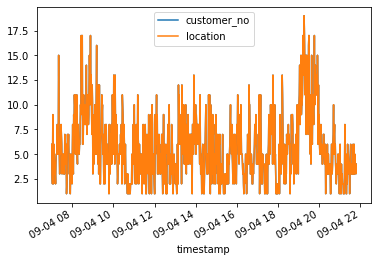

In [40]:
wednesday.groupby('timestamp').count().plot()

In [45]:
cust_2 = wednesday[wednesday['customer_no'] == 2]
cust_1 = wednesday[wednesday['customer_no'] == 1]

In [41]:
wednesday.groupby('location').count()

,timestamp,customer_no
location,,
checkout,1526,1526
dairy,976,976
drinks,775,775
fruit,1043,1043
spices,730,730


In [46]:
cust_1.head()

,timestamp,customer_no,location
0,2019-09-04 07:00:00,1,fruit
9,2019-09-04 07:02:00,1,checkout


In [48]:
cust_1.pivot(index ='customer_no', columns='location')

timestamp                    
location               checkout               fruit
customer_no                                        
1           2019-09-04 07:02:00 2019-09-04 07:00:00

In [49]:
cust_2.pivot(index ='customer_no', columns='location')

timestamp                                        
location               checkout               dairy              spices
customer_no                                                            
2           2019-09-04 07:06:00 2019-09-04 07:00:00 2019-09-04 07:05:00

In [54]:
pd.crosstab(cust_1['customer_no'], cust_1['timestamp'], normalize=0)

timestamp,2019-09-04 07:00:00,2019-09-04 07:02:00
customer_no,,
1,0.5,0.5


In [55]:
cust_2

,timestamp,customer_no,location
1,2019-09-04 07:00:00,2,dairy
23,2019-09-04 07:05:00,2,spices
25,2019-09-04 07:06:00,2,checkout


In [109]:
cust_2 = cust_2.set_index(cust_2['timestamp'])


KeyError: 'timestamp'

In [125]:
#for i in [0,1,2,3]:
cust_2['before']= cust_2['location'].shift(periods=1)
cust_2['after'] = cust_2['location']

In [126]:
cust_2.head()

,customer_no,location,after,before
timestamp,,,,
2019-09-04 07:00:00,2,dairy,dairy,NaN
2019-09-04 07:05:00,2,spices,spices,dairy
2019-09-04 07:06:00,2,checkout,checkout,spices


In [128]:
pd.crosstab(cust_2['after'], cust_2['before'])#,normalize=0)

before,dairy,spices
after,,
checkout,0,1
spices,1,0


In [64]:
### Calculate the time each customer spent in the market
## Time of entrance
## Time of Checkout 
## Diference 

tuesday[tuesday['customer_no'] == 2]


,timestamp,customer_no,location
1,2019-09-03 07:02:00,2,drinks
34,2019-09-03 07:14:00,2,fruit
61,2019-09-03 07:17:00,2,checkout


In [63]:
min_gb = tuesday.groupby('customer_no').min()
min_gb[min_gb['location'] != 'checkout']


,timestamp,location
customer_no,,
1411,2019-09-03 21:29:00,dairy
1422,2019-09-03 21:46:00,dairy


In [1]:
min_gb = tuesday.groupby(['customer_no','location']).min()

NameError: name 'tuesday' is not defined

In [62]:
max_gb = tuesday.groupby('customer_no').max()
max_gb[max_gb['location'] != 'checkout']

,timestamp,location
customer_no,,
1,2019-09-03 07:12:00,fruit
2,2019-09-03 07:17:00,fruit
3,2019-09-03 07:10:00,dairy
4,2019-09-03 07:12:00,spices
5,2019-09-03 07:09:00,dairy
...,...,...
1418,2019-09-03 21:43:00,drinks
1419,2019-09-03 21:43:00,fruit
1420,2019-09-03 21:46:00,drinks


In [31]:
df = min_gb.merge(max_gb,how='left', on='customer_no')
#df['duration'] = timestamp_y - timestamp_x
df.head()

,timestamp_x,location_x,timestamp_y,location_y
customer_no,,,,
1,2019-09-03 07:02:00,checkout,2019-09-03 07:12:00,fruit
2,2019-09-03 07:02:00,checkout,2019-09-03 07:17:00,fruit
3,2019-09-03 07:03:00,checkout,2019-09-03 07:10:00,dairy
4,2019-09-03 07:06:00,checkout,2019-09-03 07:12:00,spices
5,2019-09-03 07:06:00,checkout,2019-09-03 07:09:00,dairy


In [36]:
df['duration'] = df['timestamp_y'] - df['timestamp_x']


,timestamp_x,location_x,timestamp_y,location_y,duration
customer_no,,,,,
1,2019-09-03 07:02:00,checkout,2019-09-03 07:12:00,fruit,0 days 00:10:00
2,2019-09-03 07:02:00,checkout,2019-09-03 07:17:00,fruit,0 days 00:15:00
3,2019-09-03 07:03:00,checkout,2019-09-03 07:10:00,dairy,0 days 00:07:00
4,2019-09-03 07:06:00,checkout,2019-09-03 07:12:00,spices,0 days 00:06:00
5,2019-09-03 07:06:00,checkout,2019-09-03 07:09:00,dairy,0 days 00:03:00


In [40]:
df.describe()

,duration
count,1422
mean,0 days 00:06:07.130801687
std,0 days 00:05:39.683271018
min,0 days 00:01:00
25%,0 days 00:02:00
50%,0 days 00:04:00
75%,0 days 00:08:00
max,0 days 00:37:00


In [47]:
s1 = pd.Series(df['duration'])
s1

customer_no
1      0 days 00:10:00
2      0 days 00:15:00
3      0 days 00:07:00
4      0 days 00:06:00
5      0 days 00:03:00
             ...      
1418   0 days 00:06:00
1419   0 days 00:01:00
1420   0 days 00:03:00
1421   0 days 00:02:00
1422   0 days 00:01:00
Name: duration, Length: 1422, dtype: timedelta64[ns]

In [54]:
df['duration_min'] = df['duration'].dt.components['minutes']
df.head()

,timestamp_x,location_x,timestamp_y,location_y,duration,duration_min
customer_no,,,,,,
1,2019-09-03 07:02:00,checkout,2019-09-03 07:12:00,fruit,0 days 00:10:00,10
2,2019-09-03 07:02:00,checkout,2019-09-03 07:17:00,fruit,0 days 00:15:00,15
3,2019-09-03 07:03:00,checkout,2019-09-03 07:10:00,dairy,0 days 00:07:00,7
4,2019-09-03 07:06:00,checkout,2019-09-03 07:12:00,spices,0 days 00:06:00,6
5,2019-09-03 07:06:00,checkout,2019-09-03 07:09:00,dairy,0 days 00:03:00,3


In [55]:
df.describe()

,duration,duration_min
count,1422,1422.000000
mean,0 days 00:06:07.130801687,6.118847
std,0 days 00:05:39.683271018,5.661388
min,0 days 00:01:00,1.000000
25%,0 days 00:02:00,2.000000
50%,0 days 00:04:00,4.000000
75%,0 days 00:08:00,8.000000
max,0 days 00:37:00,37.000000


In [202]:
### Calculate the total of customers in the supermarket over time 
tuesday['hour'] = tuesday['timestamp'].dt.hour
tuesday['minute'] = tuesday['timestamp'].dt.minute
tuesday['time_order']= 
tuesday[tuesday['hour']==7]

,timestamp,customer_no,location,first_location,hour,minute,time_order
0,2019-09-03 07:02:00,1,fruit,0,7,2,0 7\n3 7\n25 7\n1 7...
3,2019-09-03 07:05:00,1,drinks,fruit,7,5,0 7\n3 7\n25 7\n1 7...
25,2019-09-03 07:12:00,1,checkout,drinks,7,12,0 7\n3 7\n25 7\n1 7...
1,2019-09-03 07:02:00,2,drinks,0,7,2,0 7\n3 7\n25 7\n1 7...
34,2019-09-03 07:14:00,2,fruit,drinks,7,14,0 7\n3 7\n25 7\n1 7...
...,...,...,...,...,...,...,...
312,2019-09-03 07:57:00,101,drinks,0,7,57,0 7\n3 7\n25 7\n1 7...
313,2019-09-03 07:57:00,102,drinks,0,7,57,0 7\n3 7\n25 7\n1 7...
325,2019-09-03 07:59:00,102,checkout,drinks,7,59,0 7\n3 7\n25 7\n1 7...
326,2019-09-03 07:59:00,103,dairy,0,7,59,0 7\n3 7\n25 7\n1 7...


In [18]:
tuesday['customer_no'].groupby(tuesday['hour']).count()

hour
7     328
8     463
9     262
10    267
11    133
12    199
13    330
14    343
15    223
16    405
17    366
18    444
19    437
20    320
21    194
Name: customer_no, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='Count'>

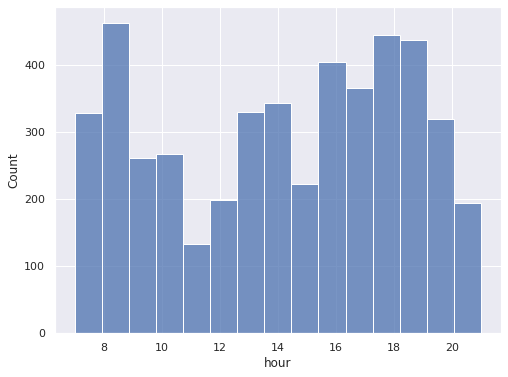

In [36]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
sns.histplot(data=tuesday, x='hour')

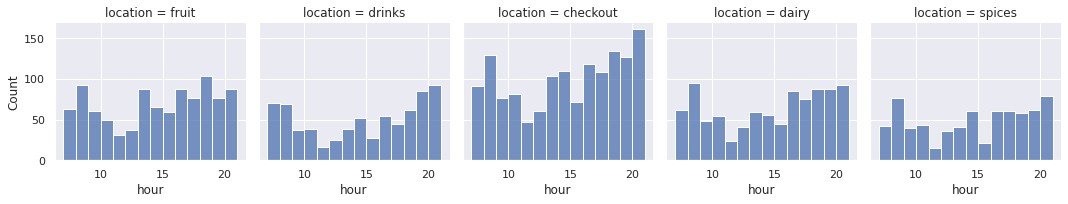

In [195]:
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.displot(
    tuesday, x='hour',col='location', col_wrap=5,
    binwidth=1, height= 3, facet_kws=dict(margin_titles=True))

In [4]:
#Calculate the total number of customers in each section over time

tuesday.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy


In [11]:
tuesday['customer_no'].groupby(tuesday['timestamp']).count()

timestamp
2019-09-03 07:02:00    2
2019-09-03 07:03:00    1
2019-09-03 07:05:00    1
2019-09-03 07:06:00    2
2019-09-03 07:07:00    3
                      ..
2019-09-03 21:46:00    4
2019-09-03 21:47:00    2
2019-09-03 21:48:00    1
2019-09-03 21:49:00    1
2019-09-03 21:50:00    1
Name: customer_no, Length: 861, dtype: int64

In [ ]:
#Display the number of customers at checkout over time

In [ ]:
## The checkout customers over time using time as index



In [42]:
## Tuesday probability matrix  For 1 customer 

tuesday = tuesday.sort_values(by=['customer_no','timestamp'])
tuesday['first_location']= tuesday['location'].shift(periods=1)
tuesday['first_location']= tuesday['first_location'].fillna(0)
tuesday.head()


,timestamp,customer_no,location,hour,first_location
0,2019-09-03 07:02:00,1,fruit,7,0
3,2019-09-03 07:05:00,1,drinks,7,fruit
25,2019-09-03 07:12:00,1,checkout,7,drinks
1,2019-09-03 07:02:00,2,drinks,7,checkout
34,2019-09-03 07:14:00,2,fruit,7,drinks


In [50]:
customer_1 = tuesday[tuesday['customer_no']== 1]
customer_2 = tuesday[tuesday['customer_no']== 2]
customer_3 = tuesday[tuesday['customer_no']== 3]

In [54]:
tprob = pd.crosstab(tuesday['location'], tuesday['first_location'], normalize=0)
tprob_c1 = pd.crosstab(customer_1['location'], customer_1['first_location'], normalize=0)
tprob_c2 = pd.crosstab(customer_2['location'], customer_2['first_location'], normalize=0)
tprob_c3 = pd.crosstab(customer_3['location'], customer_3['first_location'], normalize=0)

In [81]:
#tprob = tprob.drop([0], axis=1)
tprob

NameError: name 'tprob' is not defined

<AxesSubplot:xlabel='first_location', ylabel='location'>

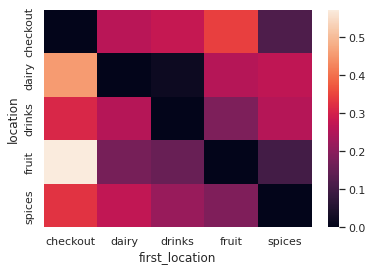

In [70]:
sns.heatmap(data=tprob)

In [77]:
#tprob_c1 = tprob_c1.drop([0],axis=1)
tprob_c1

first_location,drinks,fruit
location,,
checkout,1.0,0.0
drinks,0.0,1.0
fruit,0.0,0.0


In [78]:
tprob_c1.iloc[0]

first_location
drinks    1.0
fruit     0.0
Name: checkout, dtype: float64

In [80]:
tprob_c1.iloc[0].index[0]

'drinks'

In [81]:
tprob_c1.iloc[0].index

Index(['drinks', 'fruit'], dtype='object', name='first_location')

In [99]:
tprob_c1.iloc[0].index

Index(['drinks', 'fruit'], dtype='object', name='first_location')

In [100]:
tprob_c1.iloc[0]

first_location
drinks    1.0
fruit     0.0
Name: checkout, dtype: float64

In [101]:
tprob_c1.iloc[0].index[0]

'drinks'

In [102]:
tprob_c1.iloc[0]

first_location
drinks    1.0
fruit     0.0
Name: checkout, dtype: float64

In [103]:
tprob_c1.iloc[0].index

Index(['drinks', 'fruit'], dtype='object', name='first_location')

In [90]:
### Markov Simulation 1 customer no classes
### St+1 = St*Tprob 
### How costumer 1 will behave next Monday? 

import numpy as np
import time
import random

#the statespace
states =['fruit','drinks','checkout']

#Transition probabilities matrix 
tprob_c1

#Customer 1 simulation

customer1_sim= []

customer1_sim.append(tprob_c1.iloc[0].index[0]) #customer1_sim 1st element is 'drinks'

division = np.random.choice(a=tprob_c1.iloc[0].index, p=tprob_c1.iloc[0])

customer1_sim.append(division)

customer1_sim




['fruit', 'drinks']

In [80]:
a=tprob_c1.iloc[0].index

NameError: name 'tprob_c1' is not defined

In [121]:
tuesday = tuesday.sort_values(by=['customer_no','timestamp'])
#tuesday = tuesday.drop(['second_location'], axis=1)
tuesday.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
3,2019-09-03 07:05:00,1,drinks
25,2019-09-03 07:12:00,1,checkout
1,2019-09-03 07:02:00,2,drinks
34,2019-09-03 07:14:00,2,fruit


In [130]:
#tuesday['second_location'] = first_location
#tuesday['second_location'] = tuesday['second_location'].fillna(0)
tuesday= tuesday.drop(['second_location'], axis=1)
tuesday.head()


,timestamp,customer_no,location,first_location
0,2019-09-03 07:02:00,1,fruit,0
3,2019-09-03 07:05:00,1,drinks,fruit
25,2019-09-03 07:12:00,1,checkout,drinks
1,2019-09-03 07:02:00,2,drinks,0
34,2019-09-03 07:14:00,2,fruit,drinks


In [131]:
cust_time = tuesday.groupby('customer_no')

first_location = []

for customer, df_locations in cust_time:
    
    x = list(df_locations['location'].shift(1))
   
    first_location += x
    
print(len(first_location))

4714


In [133]:
tuesday['first_location'] = first_location
tuesday['first_location'] = tuesday['first_location'].fillna(0)
tuesday.head(10)

,timestamp,customer_no,location,first_location
0,2019-09-03 07:02:00,1,fruit,0
3,2019-09-03 07:05:00,1,drinks,fruit
25,2019-09-03 07:12:00,1,checkout,drinks
1,2019-09-03 07:02:00,2,drinks,0
34,2019-09-03 07:14:00,2,fruit,drinks
61,2019-09-03 07:17:00,2,checkout,fruit
2,2019-09-03 07:03:00,3,dairy,0
13,2019-09-03 07:10:00,3,checkout,dairy
4,2019-09-03 07:06:00,4,dairy,0
9,2019-09-03 07:08:00,4,spices,dairy


In [134]:
### Markov Simulation 3 customers no classes
ctest = tuesday[tuesday['customer_no'] <= 3]
ctest

,timestamp,customer_no,location,first_location
0,2019-09-03 07:02:00,1,fruit,0
3,2019-09-03 07:05:00,1,drinks,fruit
25,2019-09-03 07:12:00,1,checkout,drinks
1,2019-09-03 07:02:00,2,drinks,0
34,2019-09-03 07:14:00,2,fruit,drinks
61,2019-09-03 07:17:00,2,checkout,fruit
2,2019-09-03 07:03:00,3,dairy,0
13,2019-09-03 07:10:00,3,checkout,dairy


In [135]:
tprob_test = pd.crosstab(ctest['first_location'], ctest['location'], normalize=0)
tprob_test

location,checkout,dairy,drinks,fruit
first_location,,,,
0,0.0,0.333333,0.333333,0.333333
dairy,1.0,0.000000,0.000000,0.000000
drinks,0.5,0.000000,0.000000,0.500000
fruit,0.5,0.000000,0.500000,0.000000


In [136]:
tprob_test = tprob_test.drop([0],axis=0)
tprob_test

location,checkout,dairy,drinks,fruit
first_location,,,,
dairy,1.0,0.0,0.0,0.0
drinks,0.5,0.0,0.0,0.5
fruit,0.5,0.0,0.5,0.0


In [142]:
tprob_test = tprob_test.transpose()
tprob_test

first_location,dairy,drinks,fruit
location,,,
checkout,1.0,0.5,0.5
dairy,0.0,0.0,0.0
drinks,0.0,0.0,0.5
fruit,0.0,0.5,0.0


In [143]:
TProb = tprob_test.to_dict(orient='list')
TProb

{'dairy': [1.0, 0.0, 0.0, 0.0],
 'drinks': [0.5, 0.0, 0.0, 0.5],
 'fruit': [0.5, 0.0, 0.5, 0.0]}

In [ ]:
#l1_dairy = {'location':['drinks','fruit','checkout'],
#            'prob':[0,0,.3333]}
                        
#l1_drinks = [location:{'dairy','fruit','checkout'},
#              prob:{0,0,.3333}]

#customer_sim= []
#customer_sim.append(tprob_c1.iloc[0].index[0])
#division = np.random.choice(a=tprob_c1.iloc[0].index, p=tprob_c1.iloc[0])
#customer_sim.append(division)

In [171]:
import random

States = tprob_test.index

def mc_simulation(i,TProb):
    history = [i]
    
    while history[-1] != 'checkout':
             
        probs = TProb[history[-1]]
        print(probs)
        next_state = random.choices(States,probs)[0]
        print(next_state)
        history.append(next_state)

    return history
               
 

In [172]:
mc_simulation('drinks',TProb)


[0.5, 0.0, 0.0, 0.5]
fruit
[0.5, 0.0, 0.5, 0.0]
drinks
[0.5, 0.0, 0.0, 0.5]
checkout


['drinks', 'fruit', 'drinks', 'checkout']

In [166]:
TProb

{'dairy': [1.0, 0.0, 0.0, 0.0],
 'drinks': [0.5, 0.0, 0.0, 0.5],
 'fruit': [0.5, 0.0, 0.5, 0.0]}

In [173]:
ctest.head()

,timestamp,customer_no,location,first_location
0,2019-09-03 07:02:00,1,fruit,0
3,2019-09-03 07:05:00,1,drinks,fruit
25,2019-09-03 07:12:00,1,checkout,drinks
1,2019-09-03 07:02:00,2,drinks,0
34,2019-09-03 07:14:00,2,fruit,drinks


In [179]:
tuesday['timestamp'].min()

Timestamp('2019-09-03 07:02:00')

In [184]:
from datetime import datetime

datetime_object = datetime.strptime('Sep 3 2019  07:00AM', '%b %d %Y %I:%M%p')

In [185]:
datetime_object

datetime.datetime(2019, 9, 3, 7, 0)

In [188]:
from datetime import datetime

date_time_str = '3/09/19 07:00:00'

opening = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')


print ("The type of the date is now",  type(opening))
print ("The date is", opening)

The type of the date is now <class 'datetime.datetime'>
The date is 2019-09-03 07:00:00
